In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
X_sim = ((np.random.random(size=(1000,2))*6).astype('int')+1).sum(axis=1)
x_s, f_s = np.unique(X_sim, return_counts=True)
x_s, f_s

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([ 22,  58,  68, 124, 133, 166, 142, 118,  87,  50,  32]))

In [35]:
S = []  # Espacio muestral
for dado_1 in range(6):
    for dado_2 in range(6):
        print((dado_1+1, dado_2+1), [dado_1+1 + dado_2+1], end=", ")
        S += [dado_1+1 + dado_2+1]  # Suma de 2 dados
    print()

x_th, f_th = np.unique(S, return_counts=True)
x_th, f_th/f_th.sum(), (f_th/f_th.sum()).sum()

(1, 1) [2], (1, 2) [3], (1, 3) [4], (1, 4) [5], (1, 5) [6], (1, 6) [7], 
(2, 1) [3], (2, 2) [4], (2, 3) [5], (2, 4) [6], (2, 5) [7], (2, 6) [8], 
(3, 1) [4], (3, 2) [5], (3, 3) [6], (3, 4) [7], (3, 5) [8], (3, 6) [9], 
(4, 1) [5], (4, 2) [6], (4, 3) [7], (4, 4) [8], (4, 5) [9], (4, 6) [10], 
(5, 1) [6], (5, 2) [7], (5, 3) [8], (5, 4) [9], (5, 5) [10], (5, 6) [11], 
(6, 1) [7], (6, 2) [8], (6, 3) [9], (6, 4) [10], (6, 5) [11], (6, 6) [12], 


(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
        0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
        0.02777778]),
 1.0)

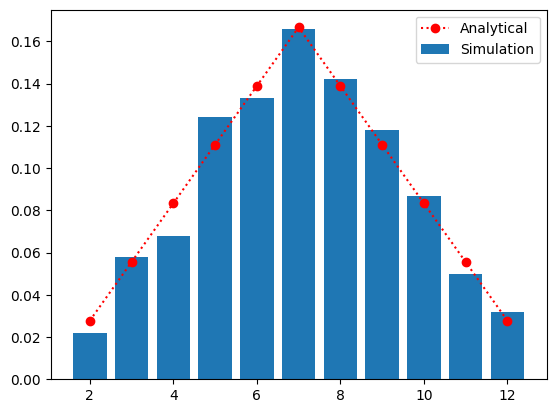

In [36]:
plt.bar(x_s, f_s/f_s.sum(), label="Simulation")
plt.plot(x_th, f_th/f_th.sum(), ":or", label="Analytical")
plt.legend()

In [37]:
import pandas as pd

In [43]:
dos_dados = pd.DataFrame({'x': x_th, "PMF": f_th/f_th.sum()})
dos_dados["CDF"] = dos_dados.PMF.cumsum()
dos_dados

,x,PMF,CDF
0,2,0.027778,0.027778
1,3,0.055556,0.083333
2,4,0.083333,0.166667
3,5,0.111111,0.277778
4,6,0.138889,0.416667
5,7,0.166667,0.583333
6,8,0.138889,0.722222
7,9,0.111111,0.833333
8,10,0.083333,0.916667
9,11,0.055556,0.972222


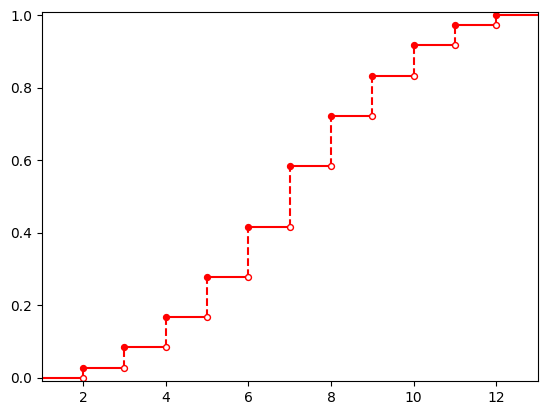

In [46]:
x = np.arange(1, 14)  # Provide range +-1
cdfx = np.array(dos_dados.CDF)

def plot_cdf(rvs_range, cdf_prob):
    yn = np.insert(cdf_prob, 0, 0)
    fig, ax = plt.subplots()
    ax.set_facecolor('white')

    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hlines.html
    ax.hlines(y=yn, xmin=rvs_range[:-1], xmax=rvs_range[1:],
              color='red', zorder=1)

    # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.vlines.html
    ax.vlines(x=rvs_range[1:-1], ymin=yn[:-1], ymax=yn[1:], color='red',
              linestyle='dashed', zorder=1)

    ax.scatter(rvs_range[1:-1], cdf_prob, color='red', s=18, zorder=2)
    ax.scatter(rvs_range[1:-1], yn[:-1], color='white', s=18, zorder=2,
               edgecolor='red')
    ax.grid(False)
    ax.set_xlim(rvs_range[0], rvs_range[-1])
    ax.set_ylim([-0.01, 1.01])
    plt.show()
    
plot_cdf(x, cdfx)

In [61]:
min_x = 2
a = 4
b = 8
print("X:", dos_dados.x[a-min_x:b-min_x+1])
print("PMF:", dos_dados.PMF[a-min_x:b-min_x+1].sum())
print("CDF:", dos_dados.CDF[b-min_x] - dos_dados.CDF[a-min_x-1])
a-1, b, a-min_x-1, b-min_x

X: 2    4
3    5
4    6
5    7
6    8
Name: x, dtype: int64
PMF: 0.6388888888888888
CDF: 0.638888888888889


(3, 8, 1, 6)

In [78]:
U = np.random.random(1000)
F = np.concatenate(([0], dos_dados.CDF))
X_sim = np.array([np.where(F > ui)[0][0] for ui in U])+1
x_s1, f_s1 = np.unique(X_sim, return_counts=True)
X_sim.min(), X_sim.max()

(2, 12)

In [79]:
F

array([0.        , 0.02777778, 0.08333333, 0.16666667, 0.27777778,
       0.41666667, 0.58333333, 0.72222222, 0.83333333, 0.91666667,
       0.97222222, 1.        ])

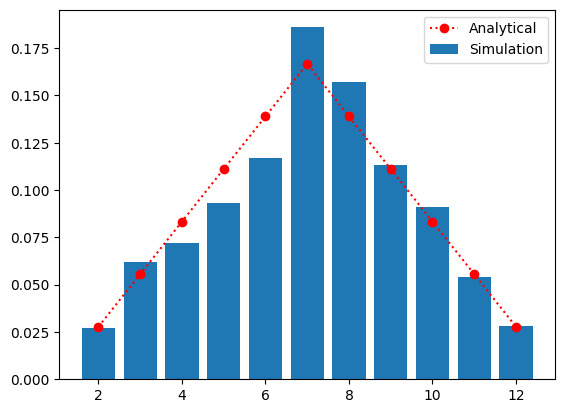

In [80]:
plt.bar(x_s1, f_s1/f_s1.sum(), label="Simulation")
plt.plot(x_th, f_th/f_th.sum(), ":or", label="Analytical")
plt.legend()

In [82]:
(dos_dados.x * dos_dados.PMF).sum()

6.999999999999998

In [85]:
S = []  # Espacio muestral
for dado_1 in range(6):
    S += [[]]
    for dado_2 in range(6):
        print((dado_1+1, dado_2+1), [dado_1+1 + dado_2+1], end=", ")
        S[-1] += [dado_1+1 + dado_2+1]  # Suma de 2 dados
    print()
S = np.matrix(S)
S

(1, 1) [2], (1, 2) [3], (1, 3) [4], (1, 4) [5], (1, 5) [6], (1, 6) [7], 
(2, 1) [3], (2, 2) [4], (2, 3) [5], (2, 4) [6], (2, 5) [7], (2, 6) [8], 
(3, 1) [4], (3, 2) [5], (3, 3) [6], (3, 4) [7], (3, 5) [8], (3, 6) [9], 
(4, 1) [5], (4, 2) [6], (4, 3) [7], (4, 4) [8], (4, 5) [9], (4, 6) [10], 
(5, 1) [6], (5, 2) [7], (5, 3) [8], (5, 4) [9], (5, 5) [10], (5, 6) [11], 
(6, 1) [7], (6, 2) [8], (6, 3) [9], (6, 4) [10], (6, 5) [11], (6, 6) [12], 


matrix([[ 2,  3,  4,  5,  6,  7],
        [ 3,  4,  5,  6,  7,  8],
        [ 4,  5,  6,  7,  8,  9],
        [ 5,  6,  7,  8,  9, 10],
        [ 6,  7,  8,  9, 10, 11],
        [ 7,  8,  9, 10, 11, 12]])

<AxesSubplot:>

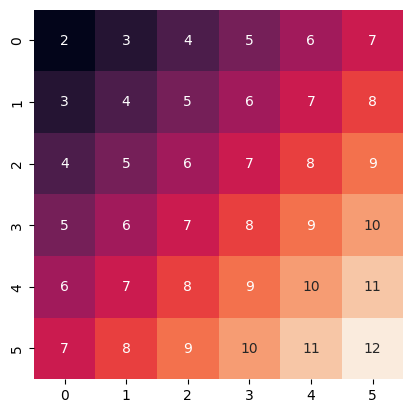

In [88]:
import seaborn as sns

sns.heatmap(S, annot=True, cbar=False, square=True)

<AxesSubplot:>

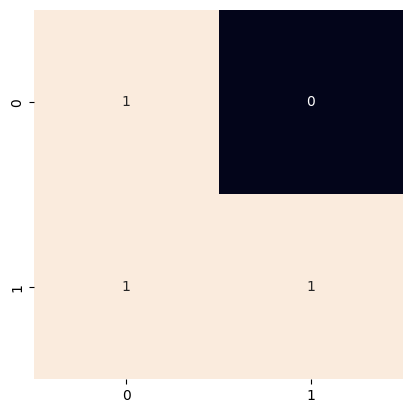

In [102]:
sns.heatmap(np.random.randint(2, size=(2,2)), cbar=False, square=True, annot=True)

<AxesSubplot:>

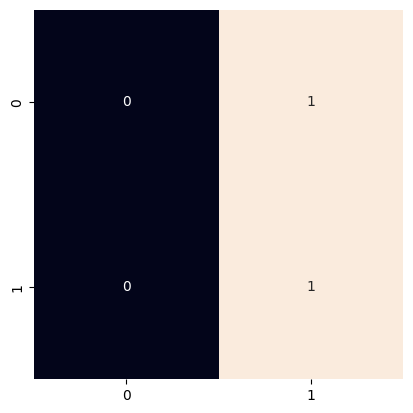

In [107]:
from scipy.stats import bernoulli

sns.heatmap(bernoulli.rvs(p=0.5, size=(2,2)), cbar=False, square=True, annot=True)

### Some extra examples of simulating probability and randomness

1. What is the probability of a 1D random walk returning to the origin.

2. A certain family has 6 children, consisting of 3 boys and 3 girls. Assuming that all birth orders are equally likely, what is the probability that the 3 eldest children are the 3 girls?

3. A city with 6 districts has 6 robberies in a particular week. Assume the robberies are located randomly, with all possibilities for which robbery occurred where equally likely. What is the probability that some district had more than 1 robbery?

4. Tyrion, Cersei, and ten other people are sitting at a round table, with their seating arrangement having been randomly assigned. What is the probability that Tyrion and Cersei are sitting next to each other?


In [131]:
mesa = list("TC" + "U"*10)
np.random.shuffle(mesa)
mesa = "".join(mesa)
mesa = mesa[-1] + mesa + mesa[0]
mesa

'UCTUUUUUUUUUUC'

In [132]:
mesa.find("TC") + mesa.find("CT")

0

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>